# TensorFlow Classifier Tutorial

The TensorFlow Sequential Classifier is a machine learning model implemented using the Sequential API in TensorFlow, built with the Keras neural networks API. It is designed for the task of classification, which involves assigning predefined labels or categories to input data.

https://www.tensorflow.org/tutorials/images/classification

# Import librairies

In [ ]:
# Third-Party Librairies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob, os
import pathlib
from pathlib import Path
import cv2
import re

# TensorFlow
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
# Google Colab - if want to train your model in Google Colab using the Google GPU
from google.colab import drive

# Mount Drive

In [ ]:
drive.mount('/content/drive')

os.chdir('Path to your training data repository')

Mounted at /content/drive


# Import Images

In [ ]:
data_dir = pathlib.Path('Path to the pictures repository')

In [ ]:
images = glob.glob('*/*.jpg')

In [ ]:
image_count = len(list(glob.glob('handwritten/*.jpg'))) # Example: all the JPGs in the "handwritten" folder, also belonging to that class
print(image_count) # Number of pictures in the folder

3020


In [ ]:
image_count = len(list(glob.glob('printed/*.jpg')))
print(image_count)

3020


In [ ]:
image_count = len(list(glob.glob('Path to the pictures use for testing/*.jpg')))
print(image_count)

604


# Prepare model

In [ ]:
# Define constants for batch size, image height, and image width
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
# Create a training dataset using image_dataset_from_directory
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6040 files belonging to 2 classes.
Using 4832 files for training.


In [ ]:
# Create a validation dataset using image_dataset_from_directory
val_ds = tf.keras.utils.image_dataset_from_directory
  (data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6040 files belonging to 2 classes.
Using 1208 files for validation.


In [ ]:
# Get the class names from the training dataset
class_names = train_ds.class_names
print(class_names)

['handwritten', 'printed']


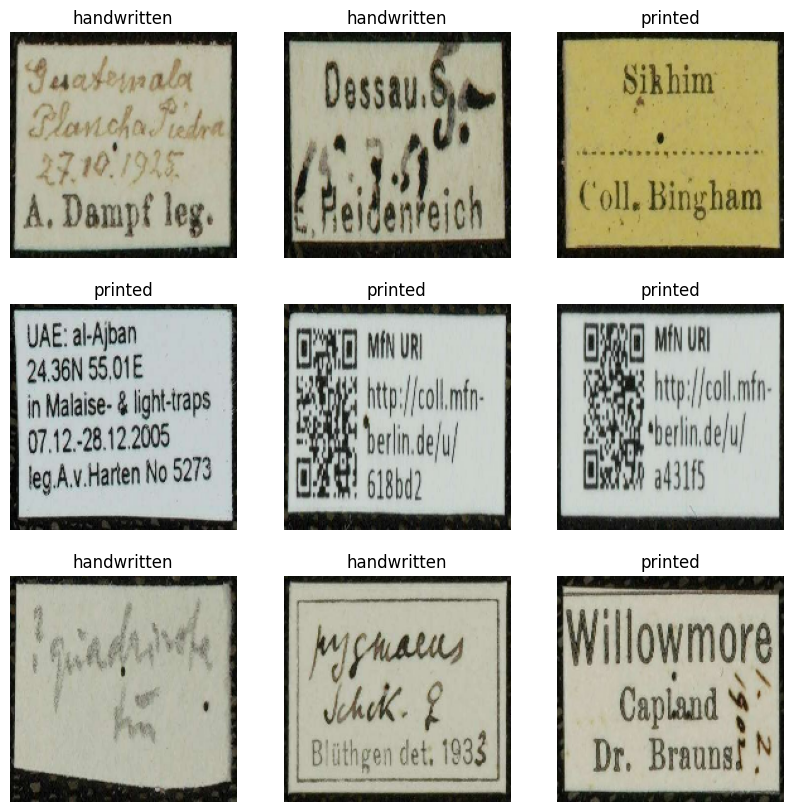

In [ ]:
# Visualize a sample of images from the training dataset
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
# Print the shape of image and label batches from the training dataset
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


# Train Model

In [ ]:
# Define AUTOTUNE for dynamic dataset tuning
AUTOTUNE = tf.data.AUTOTUNE

# Apply caching, shuffling, and prefetching to the training dataset
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

# Apply caching and prefetching to the validation dataset
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
# Create a normalization layer to rescale pixel values to [0,1]
normalization_layer = layers.Rescaling(1./255)

In [ ]:
# Apply normalization to the training dataset using the map function
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))

# Retrieve a batch of normalized images and labels
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

# Print the minimum and maximum pixel values after normalization
print(np.min(first_image), np.max(first_image))

0.0 0.86633825


In [ ]:
# Determine the number of classes based on the class names
num_classes = len(class_names)

# Build a sequential model for image classification
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='elu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='elu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='elu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='elu'),
  layers.Dense(num_classes)
])

In [ ]:
# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [ ]:
# Compile the model with Adam optimizer, sparse categorical crossentropy loss, and accuracy metric
model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics='accuracy')

In [ ]:
# Set the number of training epochs
epochs=32

# Train the model using the training dataset and validate on the validation dataset
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/32
151/151 [==============================] - 422s 3s/step - loss: 1.0161 - accuracy: 0.5958 - val_loss: 0.5769 - val_accuracy: 0.6424
Epoch 2/32
151/151 [==============================] - 184s 1s/step - loss: 0.4871 - accuracy: 0.7421 - val_loss: 0.4196 - val_accuracy: 0.8005
Epoch 3/32
151/151 [==============================] - 186s 1s/step - loss: 0.3723 - accuracy: 0.8237 - val_loss: 0.3742 - val_accuracy: 0.8369
Epoch 4/32
151/151 [==============================] - 192s 1s/step - loss: 0.2497 - accuracy: 0.8918 - val_loss: 0.2506 - val_accuracy: 0.8965
Epoch 5/32
151/151 [==============================] - 193s 1s/step - loss: 0.1740 - accuracy: 0.9276 - val_loss: 0.2218 - val_accuracy: 0.9065
Epoch 6/32
151/151 [==============================] - 195s 1s/step - loss: 0.1384 - accuracy: 0.9429 - val_loss: 0.2041 - val_accuracy: 0.9139
Epoch 7/32
151/151 [==============================] - 185s 1s/step - loss: 0.1103 - accuracy: 0.9561 - val_loss: 0.2072 - val_accuracy: 0.9214

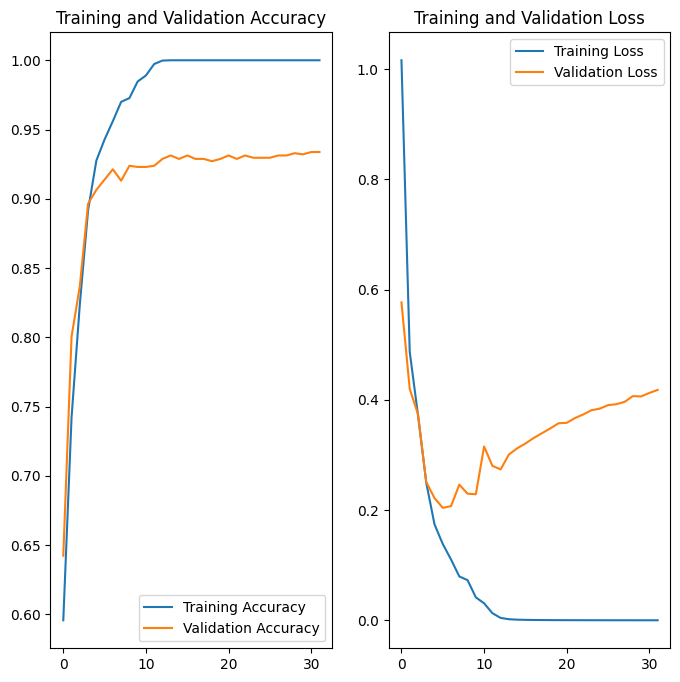

Final loss: 4.2779865907505155e-05
Final accuracy: 1.0


In [ ]:
# Extract training history for accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

# Create a plot to visualize training and validation accuracy
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Create a plot to visualize training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Extract the last accuracy and loss values for reporting
acc_last =acc*100
print("Final loss:", loss[-1])
print("Final accuracy:", acc_last[-1])

# Save Model

In [ ]:
model.save('Path where you want to save the model in your Drive')

# Load Model

In [ ]:
model = tf.keras.models.load_model('Path where the model is saved in the Drive')

# Check its architecture
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 45, 45, 64)       

# Predictions

In [ ]:
# Create a list to store all predictions
all_predictions = []
print("Predicting classes")

# Iterate over all image files in the specified directory
for file in glob.glob(f"Path to the pictures use of testing/*.jpg"):
    # Specify the path to your image
    image = tf.keras.utils.load_img(file, target_size=(img_height, img_width))
    img_array = tf.keras.utils.img_to_array(image)
    img_array = tf.expand_dims(img_array, 0)
    # Make predictions using the trained model
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    # Extract information about the prediction
    entry = {}
    entry['filename'] = os.path.basename(file)
    entry['class'] = class_names[np.argmax(score)]
    entry['score'] = 100 * np.max(score)
    # Append the prediction to the list
    all_predictions.append(entry)
    # Create a DataFrame from the list of predictions
    df = pd.DataFrame(all_predictions)
    # Save the DataFrame to a CSV file
    df.to_csv('prediction_classifer.csv')

Predicting classes
1/1 [==============================] - 0s 42ms/step


KeyboardInterrupt: ignored

# Save Predictions

In [ ]:
def create_dirs(dataframe, path) -> None:
    """
    Creates for every class a seperate directory.

    Args:
        dataframe (pd.Dataframe): dataframe containing the classes as a column
        path (str): path of chosen directory
    """
    uniques = dataframe["class"].unique()
    for uni_class in uniques:
        Path(f"{path}/{uni_class}").mkdir(parents=True, exist_ok=True)

In [ ]:
def load_jpg(filepath: str) -> np.ndarray:
    """
    Loads the jpg files using the opencv module.

    Args:
        filepath (str): path to jpg files

    Returns:
        Mat (numpy.typing.NDArray): cv2 image object
    """
    jpg = cv2.imread(filepath)
    return jpg

In [ ]:
def make_file_name(label_id: str, pic_class: str, occurence: int) -> None:
    """
    Creates a fitting filename.

    Args:
        label_id (str): string containing the label id.
        pic_class (str): class of the label.
        occurence (int): counts how many times the label class already
                         occured in the picture.
    """
    label_id = re.sub(r"_+label", "", label_id)
    filename = f"{label_id}_label_{pic_class}_{occurence}.jpg"
    return filename

In [ ]:
def crop_picture(img_raw: np.ndarray , path: str,
                 filename: str,pic_class: str) -> None:
    """
    Crops the picture using the given coordinates.

    Args:
        img_raw (numpy.matrix): input jpg converted to numpy matrix by cv2.
        path (str): path where the picture should be saved.
        filename (str): name of the picture.
        pic_class (str): class of the label.
    """
    filepath=f"{path}/{pic_class}/{filename}"
    cv2.imwrite(filepath, img_raw)

In [ ]:
# Specify the path to the repository of pictures used for testing
dir_path = 'Path to the repository of the pictures used for Testing'
# Specify the path where you want the outputs to be saved in the Drive
out_dir = 'Path where you want the outputs to be saved in the Drive'

# Check if the directory path ends with a "/"
if dir_path[-1] == "/":
    # If true, use the parent directory name followed by '_classified'
    new_dir = f"{os.path.basename(os.path.dirname(dir_path))}_classified"
else:
    # If false, use the directory name followed by '_classified'
    new_dir = f"{os.path.basename(dir_path)}_classified"

# Create the full path for the output directory
path = f"{out_dir}/{new_dir}/"
# Create the directory if it doesn't exist, including parent directories
Path(path).mkdir(parents=True, exist_ok=True)
# Create directories for every class based on the DataFrame 'df'
create_dirs(df, path)

In [ ]:
# Iterate over all JPG files in the specified directory
for filepath in glob.glob(os.path.join(dir_path, '*.jpg')):
    # Extract the filename from the full filepath
    filename = os.path.basename(filepath)
    # Find matching rows in the DataFrame 'df' for the current filename
    match = df[df.filename == filename]
    # Load the JPG image using the 'load_jpg' function
    image_raw = load_jpg(filepath)
    # Extract the stem of the filename to use as 'label_id'
    label_id = Path(filename).stem
    # Initialize an empty list to store classes for each match
    classes = []
    # Iterate over each row in the DataFrame 'match'
    for _, row in match.iterrows():
        # Extract the predicted class from the current row
        pic_class = row['class']
        # Count occurrences of the current class in the 'classes' list
        occ = classes.count(pic_class) + 1
        # Generate a new filename using 'make_file_name' function
        filename = make_file_name(label_id, pic_class, occ)
        # Crop and save the image using 'crop_picture' function
        crop_picture(image_raw, path, filename, pic_class)
# Print a message indicating successful image saving
print(f"\nThe images have been successfully saved in {os.path.join(out_dir, new_dir)}")